In [93]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [94]:
'''

df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", delimiter=';')
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", on_bad_lines='skip')


response = requests.get("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv")
print(response.text[:500])  # Visualiza os primeiros 500 caracteres
'''


'\n\ndf = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", delimiter=\';\')\ndf = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", on_bad_lines=\'skip\')\n\n\nresponse = requests.get("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv")\nprint(response.text[:500])  # Visualiza os primeiros 500 caracteres\n'

In [95]:


# URL do arquivo CSV
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

# Tenta carregar o CSV, ignorando as linhas problemáticas no início
try:
    # Define o número de linhas a serem puladas até chegar aos dados úteis
    # Ajuste o número se precisar pular mais linhas
    df = pd.read_csv(url, skiprows=22, on_bad_lines='skip')  # 20 é um exemplo, ajuste conforme necessário
    
    print("Dados carregados com sucesso a partir da linha correta!")
    display(df.head())  # Exibe as primeiras linhas do dataframe
except Exception as e:
    print(f"Erro ao ler o arquivo CSV: {e}")


Dados carregados com sucesso a partir da linha correta!


/var/folders/x1/xctbwlls7xb1bbqbwvht5xgr0000gn/T/ipykernel_79246/1618479049.py:8: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=22, on_bad_lines='skip')  # 20 é um exemplo, ajuste conforme necessário


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


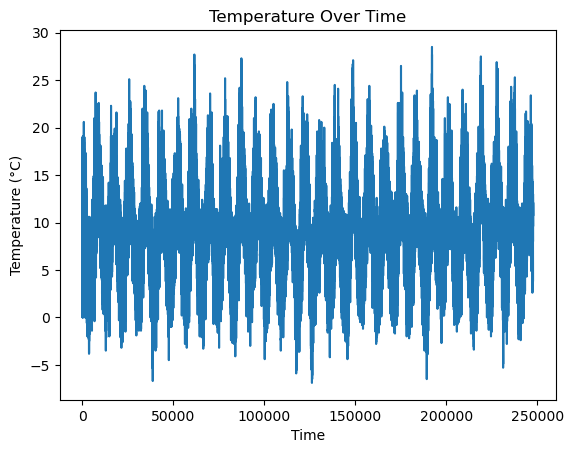

In [96]:
## Plot Temperature.

plt.plot(df['temp'])
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Over Time")
plt.savefig('plot_temperature.png')
plt.show()


In [97]:
temp_day = df[['temp', 'date']]
# Show
print(temp_day)

        temp               date
0       11.5  10-apr-1996 14:00
1       11.5  31-jul-1996 08:00
2       11.6  31-jul-1996 09:00
3       12.9  31-jul-1996 10:00
4       14.5  31-jul-1996 11:00
...      ...                ...
247669  10.1  31-oct-2024 20:00
247670  10.1  31-oct-2024 21:00
247671  10.0  31-oct-2024 22:00
247672   9.8  31-oct-2024 23:00
247673   9.7  01-nov-2024 00:00

[247674 rows x 2 columns]


In [98]:
'''
plt.plot(df['date'], df['temp'])
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Each Day")
plt.savefig('plot_temperature.png')
plt.show()
'''

'\nplt.plot(df[\'date\'], df[\'temp\'])\nplt.xlabel("Date")\nplt.ylabel("Temperature")\nplt.title("Temperature Each Day")\nplt.savefig(\'plot_temperature.png\')\nplt.show()\n'

/var/folders/x1/xctbwlls7xb1bbqbwvht5xgr0000gn/T/ipykernel_79246/838452616.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


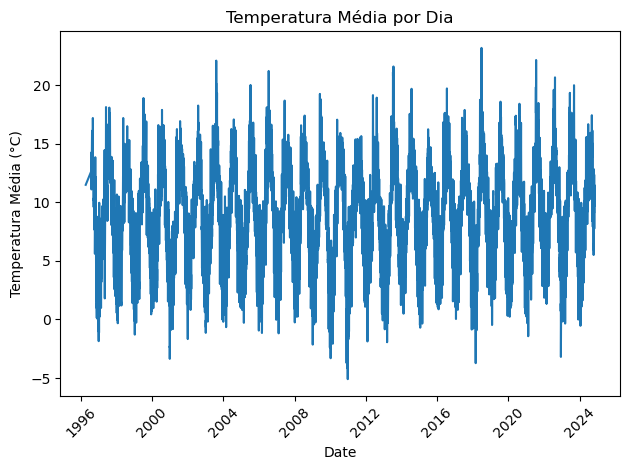

In [99]:

# Plotar a média de temperatura por dia

df['date'] = pd.to_datetime(df['date'])
daily_mean = df.groupby(df['date'].dt.date)['temp'].mean()
plt.plot(daily_mean.index, daily_mean.values)
plt.xlabel("Date")
plt.ylabel("Temperatura Média (°C)")
plt.title("Temperatura Média por Dia")
plt.xticks(rotation=45)
plt.tight_layout()  # Ajusta para não sobrepor os rótulos
plt.savefig('plot_mean_temperature.png')  # Salva a imagem
plt.show()


/var/folders/x1/xctbwlls7xb1bbqbwvht5xgr0000gn/T/ipykernel_79246/4032064223.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = df.resample('M', on='date')['temp'].mean()


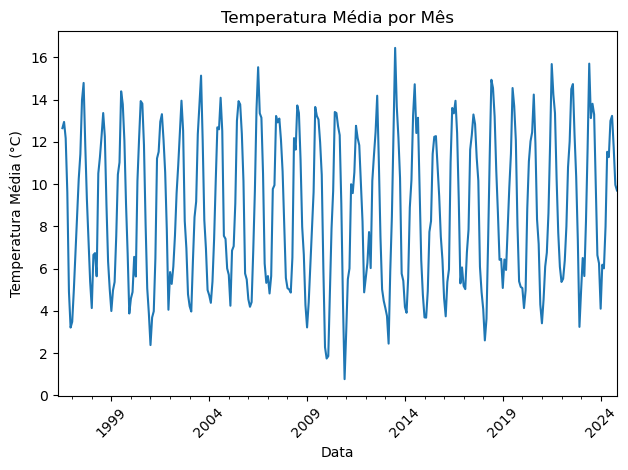

In [100]:

# Supondo que a coluna 'date' já está no formato datetime
# Se não estiver, converta-a com: df['date'] = pd.to_datetime(df['date'])

# Agrupar por mês e calcular a média da temperatura
monthly_mean = df.resample('M', on='date')['temp'].mean()

# Plotar a média de temperatura para cada mês
monthly_mean.plot(title="Temperatura Média por Mês", ylabel="Temperatura Média (°C)", xlabel="Data", rot=45)
plt.tight_layout()  # Ajuste para evitar sobreposição de rótulos
plt.savefig('plot_mean_temperature_monthly.png')  # Salva o gráfico como imagem
plt.show()


In [101]:

# As we can see, it generated a false result, which means, there is no missing value in any column
missing_values = df.isna().any()
print(missing_values)

date     False
ind      False
rain     False
ind.1    False
temp     False
ind.2    False
wetb     False
dewpt    False
vappr    False
rhum     False
msl      False
ind.3    False
wdsp     False
ind.4    False
wddir    False
ww       False
w        False
sun      False
vis      False
clht     False
clamt    False
dtype: bool


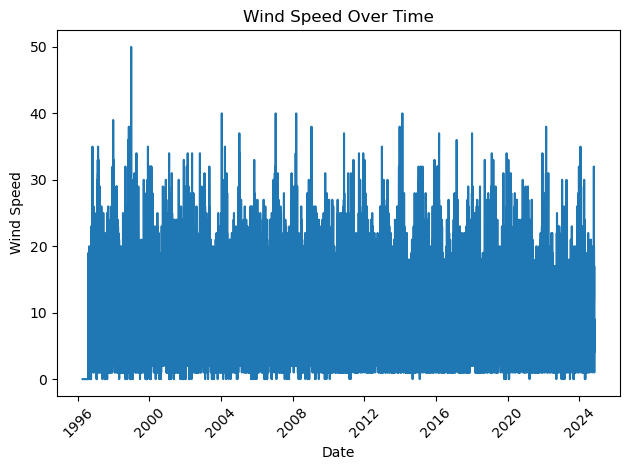

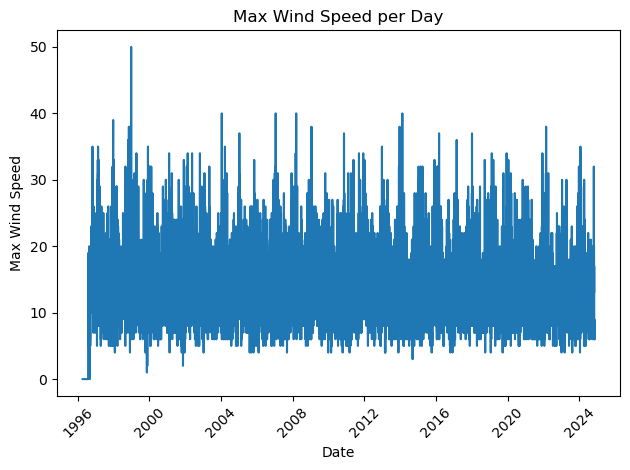

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter a coluna 'date' para o formato datetime, se ainda não estiver
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filtrar para garantir que apenas valores válidos e numéricos estejam nas colunas 'date' e 'wdsp'
df = df.dropna(subset=['date', 'wdsp'])  # Remove linhas onde 'date' ou 'wdsp' são NaN
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')  # Garante que 'wdsp' é numérico
df = df.dropna(subset=['wdsp'])  # Remove linhas onde 'wdsp' não é numérico

# Plotar a coluna 'wdsp' em relação a 'date'
plt.plot(df['date'], df['wdsp'])
plt.xlabel("Date")
plt.ylabel("Wind Speed")
plt.title("Wind Speed Over Time")
plt.xticks(rotation=45)
plt.tight_layout()  # Ajuste para evitar sobreposição de rótulos
plt.savefig('plot_windspeed.png')
plt.show()





daily_max_wind = df.groupby(df['date'].dt.date)['wdsp'].max()

# Plotar a velocidade máxima do vento para cada dia
plt.plot(daily_max_wind.index, daily_max_wind.values)
plt.xlabel("Date")
plt.ylabel("Max Wind Speed")
plt.title("Max Wind Speed per Day")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plot_max_wind_speed_per_day.png')
plt.show()
